In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("archive//Electric_Production.csv", index_col="DATE", parse_dates=True)

In [37]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [39]:
df.loc["1985"]

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


In [40]:
df.loc["1985-01":"1985-04"]

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714


In [41]:
# making average production of 1985
df.loc["1985"].mean()

IPG2211A2N    62.165667
dtype: float64

In [42]:
df.head(5)

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [43]:
df.tail(5)

,IPG2211A2N
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [45]:
# Making average production of every year
AvgYearProd = []
for i in range(1985, 2018):
    AvgYearProd.append(df.loc[f"{i}"].mean())
    print(f"Year {i} :- mean",df.loc[f"{i}"].mean())

Year 1985 :- mean IPG2211A2N    62.165667
dtype: float64
Year 1986 :- mean IPG2211A2N    62.709892
dtype: float64
Year 1987 :- mean IPG2211A2N    65.740275
dtype: float64
Year 1988 :- mean IPG2211A2N    69.716358
dtype: float64
Year 1989 :- mean IPG2211A2N    71.895167
dtype: float64
Year 1990 :- mean IPG2211A2N    73.313433
dtype: float64
Year 1991 :- mean IPG2211A2N    75.11185
dtype: float64
Year 1992 :- mean IPG2211A2N    75.120908
dtype: float64
Year 1993 :- mean IPG2211A2N    77.678992
dtype: float64
Year 1994 :- mean IPG2211A2N    79.255058
dtype: float64
Year 1995 :- mean IPG2211A2N    82.060867
dtype: float64
Year 1996 :- mean IPG2211A2N    84.382417
dtype: float64
Year 1997 :- mean IPG2211A2N    84.236192
dtype: float64
Year 1998 :- mean IPG2211A2N    86.544075
dtype: float64
Year 1999 :- mean IPG2211A2N    89.190892
dtype: float64
Year 2000 :- mean IPG2211A2N    91.790125
dtype: float64
Year 2001 :- mean IPG2211A2N    91.460792
dtype: float64
Year 2002 :- mean IPG2211A2N    

In [46]:
AvgYearProd

[IPG2211A2N    62.165667
 dtype: float64,
 IPG2211A2N    62.709892
 dtype: float64,
 IPG2211A2N    65.740275
 dtype: float64,
 IPG2211A2N    69.716358
 dtype: float64,
 IPG2211A2N    71.895167
 dtype: float64,
 IPG2211A2N    73.313433
 dtype: float64,
 IPG2211A2N    75.11185
 dtype: float64,
 IPG2211A2N    75.120908
 dtype: float64,
 IPG2211A2N    77.678992
 dtype: float64,
 IPG2211A2N    79.255058
 dtype: float64,
 IPG2211A2N    82.060867
 dtype: float64,
 IPG2211A2N    84.382417
 dtype: float64,
 IPG2211A2N    84.236192
 dtype: float64,
 IPG2211A2N    86.544075
 dtype: float64,
 IPG2211A2N    89.190892
 dtype: float64,
 IPG2211A2N    91.790125
 dtype: float64,
 IPG2211A2N    91.460792
 dtype: float64,
 IPG2211A2N    94.107075
 dtype: float64,
 IPG2211A2N    95.700108
 dtype: float64,
 IPG2211A2N    97.119225
 dtype: float64,
 IPG2211A2N    99.208242
 dtype: float64,
 IPG2211A2N    98.873225
 dtype: float64,
 IPG2211A2N    101.984167
 dtype: float64,
 IPG2211A2N    101.663992
 dtype: 

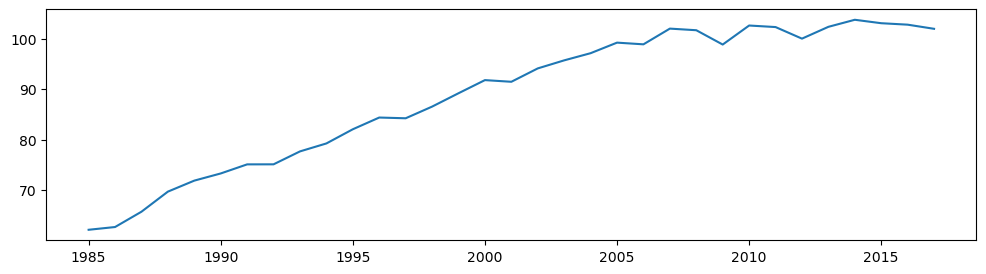

In [48]:
plt.figure(figsize=(12, 3))
plt.plot(range(1985 ,2018),AvgYearProd)

<Axes: xlabel='DATE'>

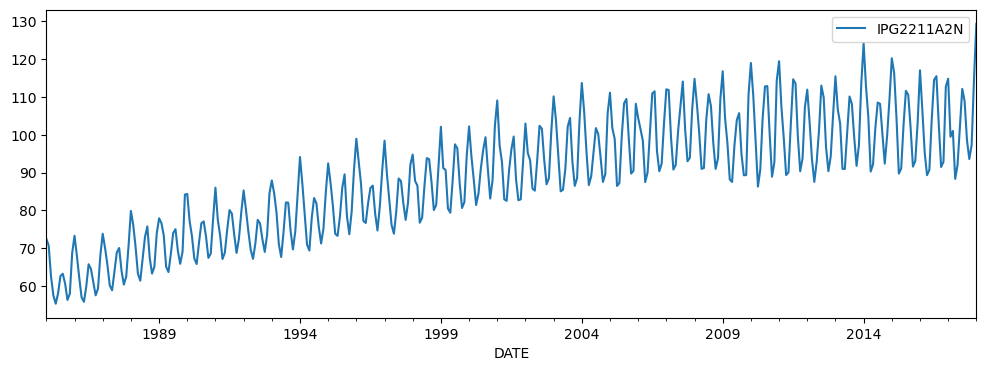

In [49]:
df.plot(figsize=(12,4))

In [50]:
# To find pattern
from statsmodels.tsa.seasonal import seasonal_decompose

In [51]:
res = seasonal_decompose(df["IPG2211A2N"])

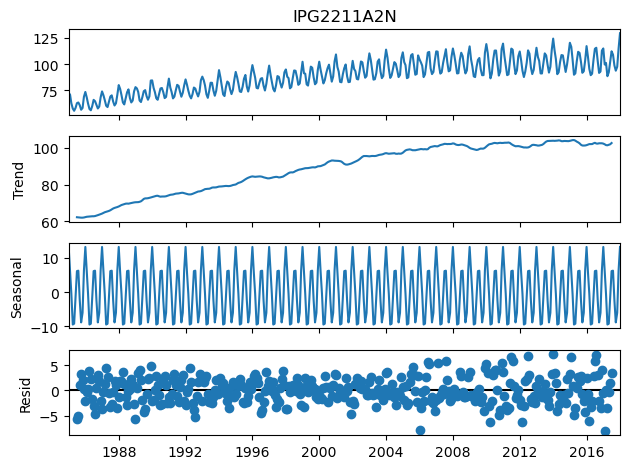

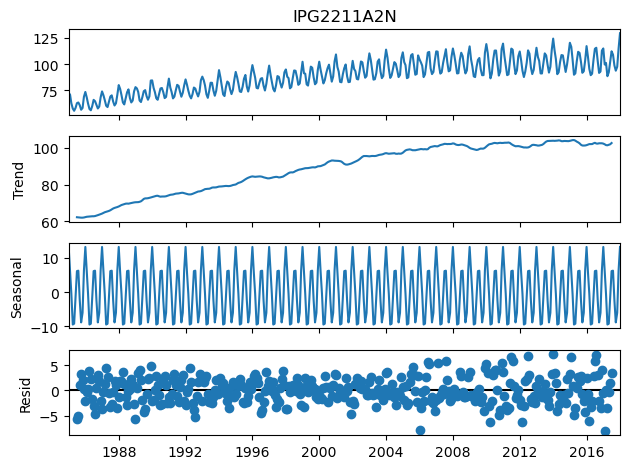

In [52]:
res.plot()

In [53]:
len(df)

397

In [54]:
train = df.iloc[:385]
test = df.iloc[385:]

In [55]:
train.shape

(385, 1)

In [56]:
test.shape

(12, 1)

In [57]:
train.iloc[0], train.iloc[-1]

(IPG2211A2N    72.5052
 Name: 1985-01-01 00:00:00, dtype: float64,
 IPG2211A2N    114.8505
 Name: 2017-01-01 00:00:00, dtype: float64)

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
mmscaler = MinMaxScaler()

In [60]:
mmscaler.fit(train)

MinMaxScaler()

In [61]:
ScaledTrain = mmscaler.transform(train)
ScaledTest = mmscaler.transform(test)

In [62]:
ScaledTrain[:10]

array([[0.24934943],
       [0.22275812],
       [0.10349754],
       [0.03127801],
       [0.        ],
       [0.04025686],
       [0.10596346],
       [0.11507721],
       [0.07643625],
       [0.01450976]])

In [63]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [65]:
TSGenerator = TimeseriesGenerator(ScaledTrain, ScaledTrain, length=3, batch_size=1)

In [66]:
TSGenerator[0]

(array([[[0.24934943],
         [0.22275812],
         [0.10349754]]]),
 array([[0.03127801]]))

In [67]:
ScaledTrain[:6]

array([[0.24934943],
       [0.22275812],
       [0.10349754],
       [0.03127801],
       [0.        ],
       [0.04025686]])

In [68]:
TSGenerator[1]

(array([[[0.22275812],
         [0.10349754],
         [0.03127801]]]),
 array([[0.]]))

In [69]:
TSGenerator[2]

(array([[[0.10349754],
         [0.03127801],
         [0.        ]]]),
 array([[0.04025686]]))

In [70]:
X, y = TSGenerator[0]

In [71]:
X.shape

(1, 3, 1)

In [72]:
TSGenerator = TimeseriesGenerator(ScaledTrain, ScaledTrain, length=12, batch_size=1)

In [73]:
X, y = TSGenerator[0]

In [74]:
X.shape

(1, 12, 1)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [76]:
model = Sequential([
    LSTM(1000, activation="relu", input_shape=(12,1)),
    Dense(1)
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.compile(optimizer="adam", loss="mse")

In [78]:
model.fit(generator, epochs=40)

Epoch 1/40


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


373/373 ━━━━━━━━━━━━━━━━━━━━ 73s 164ms/step - loss: 0.0388
Epoch 2/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 59s 156ms/step - loss: 0.0093
Epoch 3/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 60s 160ms/step - loss: 0.0049
Epoch 4/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 61s 163ms/step - loss: 0.0065
Epoch 5/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 59s 158ms/step - loss: 0.0032
Epoch 6/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - loss: 0.0044
Epoch 7/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 60s 161ms/step - loss: 0.0031
Epoch 8/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 70s 187ms/step - loss: 0.0036
Epoch 9/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 60s 161ms/step - loss: 0.0033
Epoch 11/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 63s 167ms/step - loss: 0.0038
Epoch 12/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 66s 176ms/step - loss: 0.0032
Epoch 13/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 68s 181ms/step - loss: 0.0029
Epoch 14/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 55s 147ms/step - loss: 0.0030
Epoch 17/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 54s 145ms/step - loss: 0.0029
Epoch 18/40
373/373 ━━━━━━

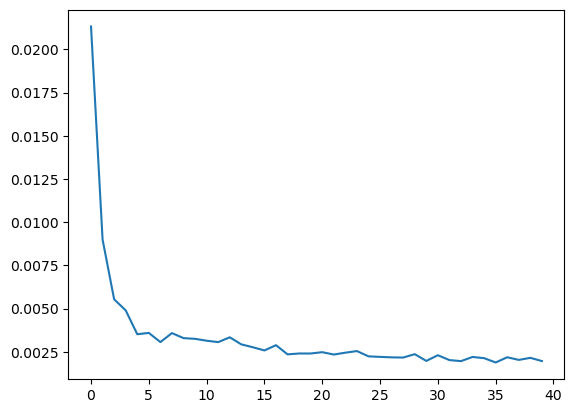

In [79]:
loss = model.history.history["loss"]
plt.plot(loss)

In [80]:
LastTrainBatch = ScaledTrain[-12:]

In [81]:
LastTrainBatch = v.reshape((1,12,1))

In [82]:
model.predict(LastTrainBatch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


array([[0.724444]], dtype=float32)

In [83]:
ScaledTest[0]

array([0.64077645])

In [84]:
0.7079017 - 0.64077645

0.06712524999999991

In [85]:
y_pred = []

FirstEvalBatch = ScaledTrain[-12:]
currBatch = FirstEvalBatch.reshape((1, 12, 1))

for i in range(len(test)):
    currPred = model.predict(currBatch)[0]
    y_pred.append(currPred)

    currBatch = np.append(currBatch[:,1:,:], [[currPred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [86]:
TruePred = scaler.inverse_transform(y_pred)
TruePred

array([[105.25812255],
       [ 94.20598667],
       [ 87.77895038],
       [ 91.84437794],
       [103.2986294 ],
       [110.16046119],
       [109.69423493],
       [100.68485555],
       [ 91.44195007],
       [ 92.6385787 ],
       [107.65475752],
       [113.85582851]])

In [87]:
test["Predicted_Production"] = TruePred

C:\Users\HP\AppData\Local\Temp\ipykernel_11296\1986336883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predicted_Production"] = true_pred


In [88]:
test.head()

,IPG2211A2N,Predicted_Production
DATE,,
2017-02-01,99.4901,105.258123
2017-03-01,101.0396,94.205987
2017-04-01,88.3530,87.778950
2017-05-01,92.0805,91.844378
2017-06-01,102.1532,103.298629


<Axes: xlabel='DATE'>

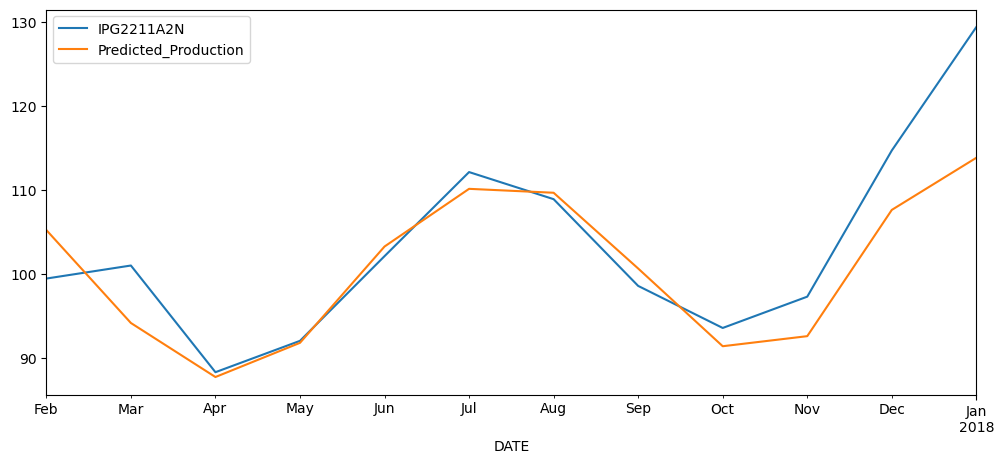

In [89]:
test.plot(figsize=(12,5))

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
RMS = np.sqrt(mean_squared_error(test["IPG2211A2N"], test["Predicted_Production"]))

In [92]:
rmse

5.838024547255394